**ML ASSIGNMENT2 - Vaibhav Khare**

Vaibhav Khare - 2025ab05182@wilp.bits-pilani.ac.in

# **K Nearest Neighbor Model on Portuguese banking institution**

***About Datset***

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [1]:
#Import Libraries
import os;
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Export Train, Test Dataset

bank_train =pd.read_csv('https://raw.githubusercontent.com/vaibhavkhare1/ML_ASSIGNMENT_COMPARISION_REPO/main/bank-full.csv');
bank_test =pd.read_csv('https://raw.githubusercontent.com/vaibhavkhare1/ML_ASSIGNMENT_COMPARISION_REPO/main/bank-test.csv')

In [3]:
# Combine and Preprocess Data

bank_combined = pd.concat([bank_train, bank_test], ignore_index=True)
print("Shape of combined DataFrame:", bank_combined.shape)
print("First 5 rows of combined DataFrame:")
print(bank_combined.head())
print("Info of combined DataFrame:")
bank_combined.info()

Shape of combined DataFrame: (49732, 17)
First 5 rows of combined DataFrame:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Info of combined DataFrame:
<class

In [4]:
#Identify the target variable 'y' and convert its categorical values ('yes', 'no') into numerical format (1 and 0, respectively).

bank_combined['y'] = bank_combined['y'].map({'yes': 1, 'no': 0})
print("Value counts for target variable 'y' after conversion:")
print(bank_combined['y'].value_counts())

Value counts for target variable 'y' after conversion:
y
0    43922
1     5810
Name: count, dtype: int64


In [5]:
#Separate the features (X) from the target variable (y)

X = bank_combined.drop('y', axis=1)
y_target = bank_combined['y']

print("Shape of features (X):", X.shape)
print("Shape of target (y_target):", y_target.shape)
print("First 5 rows of features (X):")
print(X.head())

Shape of features (X): (49732, 16)
Shape of target (y_target): (49732,)
First 5 rows of features (X):
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may       261         1     -1         0  unknown  
1  unknown    5   may       151         1     -1         0  unknown  
2  unknown    5   may        76         1     -1         0  unknown  
3  unknown    5   may        92         1     -1         0  unknown  
4  unknown    5   may       198         1     -1         0  unknown  


In [6]:
#Identify all categorical and numerical columns

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", categorical_cols.tolist())
print("Numerical columns:", numerical_cols.tolist())

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [7]:
# Apply one-hot encoding to convert these categorical variables into a numerical format suitable for machine learning models
X_categorical_encoded = pd.get_dummies(X[categorical_cols], drop_first=True)
print("Shape of one-hot encoded categorical features:", X_categorical_encoded.shape)
print("First 5 rows of one-hot encoded categorical features:")
print(X_categorical_encoded.head())

Shape of one-hot encoded categorical features: (49732, 35)
First 5 rows of one-hot encoded categorical features:
   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0            False             False          False            True   
1            False             False          False           False   
2            False              True          False           False   
3             True             False          False           False   
4            False             False          False           False   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0        False              False         False        False           False   
1        False              False         False        False            True   
2        False              False         False        False           False   
3        False              False         False        False           False   
4        False              False         False        False

In [8]:
#Scale Neumerical features to transform neumerical data to have Mean 0 and Standard deviation 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X[numerical_cols])
X_numerical_scaled = pd.DataFrame(X_numerical_scaled, columns=numerical_cols, index=X.index)

print("Shape of scaled numerical features:", X_numerical_scaled.shape)
print("First 5 rows of scaled numerical features:")
print(X_numerical_scaled.head())

Shape of scaled numerical features: (49732, 7)
First 5 rows of scaled numerical features:
        age   balance       day  duration  campaign     pdays  previous
0  1.605529  0.254880 -1.300726  0.008962  -0.57003 -0.411068 -0.255849
1  0.286628 -0.440154 -1.300726 -0.417824  -0.57003 -0.411068 -0.255849
2 -0.749651 -0.449031 -1.300726 -0.708814  -0.57003 -0.411068 -0.255849
3  0.569250  0.045450 -1.300726 -0.646736  -0.57003 -0.411068 -0.255849
4 -0.749651 -0.449359 -1.300726 -0.235470  -0.57003 -0.411068 -0.255849


In [9]:
#The next step is to concatenate the scaled numerical features and the one-hot encoded categorical features (X_categorical_encoded) to form the final preprocessed features DataFrame
X_preprocessed = pd.concat([X_numerical_scaled, X_categorical_encoded], axis=1)

print("Shape of final preprocessed features (X_preprocessed):", X_preprocessed.shape)
print("First 5 rows of final preprocessed features:")
print(X_preprocessed.head())

Shape of final preprocessed features (X_preprocessed): (49732, 42)
First 5 rows of final preprocessed features:
        age   balance       day  duration  campaign     pdays  previous  \
0  1.605529  0.254880 -1.300726  0.008962  -0.57003 -0.411068 -0.255849   
1  0.286628 -0.440154 -1.300726 -0.417824  -0.57003 -0.411068 -0.255849   
2 -0.749651 -0.449031 -1.300726 -0.708814  -0.57003 -0.411068 -0.255849   
3  0.569250  0.045450 -1.300726 -0.646736  -0.57003 -0.411068 -0.255849   
4 -0.749651 -0.449359 -1.300726 -0.235470  -0.57003 -0.411068 -0.255849   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jul  \
0            False             False          False  ...      False   
1            False             False          False  ...      False   
2            False              True          False  ...      False   
3             True             False          False  ...      False   
4            False             False          False  ...      False   

   month_j

In [10]:
# Split the preprocessed data into training and testing sets to prepare for model training and evaluation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_target, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("First 5 rows of X_train:")
print(X_train.head())

Shape of X_train: (39785, 42)
Shape of X_test: (9947, 42)
Shape of y_train: (39785,)
Shape of y_test: (9947,)
First 5 rows of X_train:
            age   balance       day  duration  campaign     pdays  previous  \
49154  0.380835  0.127973  0.503113  2.914985  0.075330  2.854813  0.187646   
48002 -0.843858 -0.192585  1.224649 -0.553619  0.398010 -0.411068 -0.255849   
30900 -0.843858 -0.389522 -0.819703 -0.937727  2.334092 -0.411068 -0.255849   
44615 -0.655444 -0.244203  1.825929 -0.871769 -0.570030 -0.411068 -0.255849   
5757  -0.843858 -0.331986  1.224649  0.532744 -0.570030 -0.411068 -0.255849   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jul  \
49154            False             False          False  ...      False   
48002            False             False          False  ...      False   
30900            False             False          False  ...      False   
44615            False             False          False  ...      False   
5757           

In [11]:
#Train a K-Nearest Neighbor classification model using the training data

from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier model with n_neighbors=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn_model.fit(X_train, y_train)

print("K-Nearest Neighbors model trained successfully.")

K-Nearest Neighbors model trained successfully.


In [12]:
#Evaluate the performance of the trained K-Nearest Neighbor model on the test set

y_pred = knn_model.predict(X_test)

print("Predictions made successfully.")
print("First 10 predictions:", y_pred[:10])

Predictions made successfully.
First 10 predictions: [0 0 0 0 0 0 0 0 0 0]



Confusion Matrix:
[[8519  277]
 [ 720  431]]


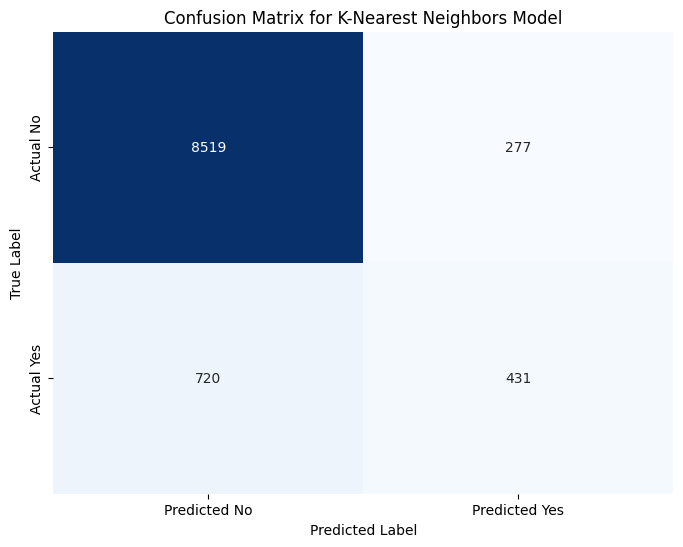

In [13]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for K-Nearest Neighbors Model')
plt.show()


In [14]:
# Evaluate the model using the defined functions
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef
accuracy = accuracy_score(y_test, y_pred)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.8998
AUC Score: 0.8522
Precision: 0.6088
Recall: 0.3745
F1 Score: 0.4637
Matthews Correlation Coefficient (MCC): 0.4267
